In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [46]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10, init='k-means++')
kmeans.fit(df)

# Mapping cluster ke kategori RIASEC
cluster_to_category = {
    0: "R",  # Cluster 0 -> R
    1: "I",  # Cluster 1 -> I
    2: "A",  # Cluster 2 -> A
    3: "S",  # Cluster 3 -> S
    4: "E",  # Cluster 4 -> E
    5: "C"   # Cluster 5 -> C
}

# Ubah hasil label cluster menjadi kategori RIASEC
df['Cluster'] = [cluster_to_category[label] for label in kmeans.labels_]

# Tampilkan DataFrame dengan hasil cluster
print(df[['Cluster']])

       Cluster
0            R
1            I
2            C
3            C
4            S
...        ...
145823       R
145824       R
145825       E
145826       A
145827       S

[145828 rows x 1 columns]


In [71]:
file_path = './data/riasec/cleaned_data.csv'
df = pd.read_csv(file_path)
df = df.loc[:, 'R1':'C8']

df.head()

,R1,R2,R3,R4,R5,R6,R7,R8,I1,I2,...,E7,E8,C1,C2,C3,C4,C5,C6,C7,C8
0,3,4,3,1,1,4,1,3,5,5,...,1,3,1,3,1,1,1,3,1,1
1,1,1,2,4,1,2,2,1,5,5,...,1,3,1,1,2,1,1,2,1,1
2,2,1,1,1,1,1,1,1,4,1,...,4,3,1,3,2,2,1,2,4,1
3,3,1,1,2,2,2,2,2,4,1,...,2,3,3,2,3,3,2,2,2,2
4,4,1,1,2,1,1,1,2,5,5,...,2,2,4,2,2,4,5,5,2,2


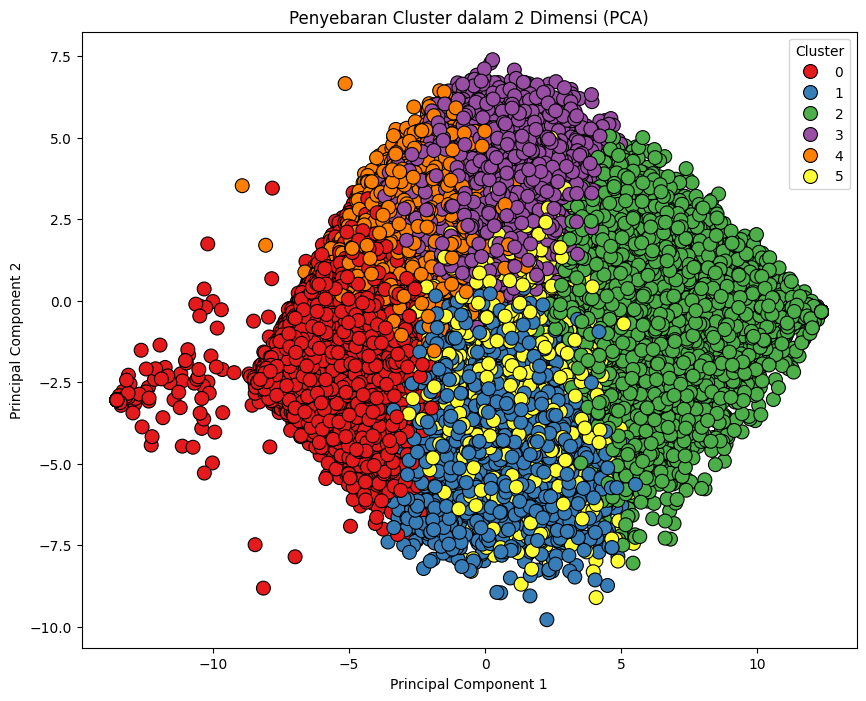

In [72]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Misal 'df' adalah DataFrame dengan data yang sudah dibersihkan dan distandarisasi
# Menggunakan PCA untuk mereduksi dimensi menjadi 2D
pca = PCA(n_components=2)

# Terapkan PCA pada data yang sudah diskalakan
df_scaled = StandardScaler().fit_transform(df)  # Pastikan df sudah distandarisasi

# Transformasi data ke 2D
df_pca = pca.fit_transform(df_scaled)

# Lakukan clustering KMeans
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10, init='k-means++', max_iter=300)
kmeans.fit(df_scaled)

# Menambahkan hasil clustering ke dalam DataFrame
df['Cluster'] = kmeans.labels_

# Membuat DataFrame baru dengan hasil PCA
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])

# Menambahkan hasil cluster ke DataFrame PCA
df_pca['Cluster'] = df['Cluster']

# Visualisasi menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=df_pca, s=100, marker='o', edgecolor='black')
plt.title("Penyebaran Cluster dalam 2 Dimensi (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [51]:
new_data = "444522114114121111244235211111142551214134523124"

# Bersihkan data dan ubah ke list angka
new_data = [int(x) for x in new_data.replace(" ", "")]


# Ubah ke DataFrame dengan kolom sama seperti dataset asli
new_df = pd.DataFrame([new_data] * 7, columns=[f"R{i}" for i in range(1, 49)])
new_df.head()

,R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,...,R39,R40,R41,R42,R43,R44,R45,R46,R47,R48
0,4,4,4,5,2,2,1,1,4,1,...,4,1,3,4,5,2,3,1,2,4
1,4,4,4,5,2,2,1,1,4,1,...,4,1,3,4,5,2,3,1,2,4
2,4,4,4,5,2,2,1,1,4,1,...,4,1,3,4,5,2,3,1,2,4
3,4,4,4,5,2,2,1,1,4,1,...,4,1,3,4,5,2,3,1,2,4
4,4,4,4,5,2,2,1,1,4,1,...,4,1,3,4,5,2,3,1,2,4


In [56]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10, init='k-means++', max_iter=300)
kmeans.fit(df)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [57]:
# Normalisasi data baru (gunakan scaler yang sama dari model sebelumnya)
scaler = StandardScaler()
new_data_scaled = scaler.fit_transform(new_df)

predicted_cluster = kmeans.predict(new_data_scaled)[3]  # Ambil elemen pertama dari array

# Mapping cluster ke kategori RIASEC
cluster_to_category = {
    0: "R",  # Cluster 0 -> R
    1: "I",  # Cluster 1 -> I
    2: "A",  # Cluster 2 -> A
    3: "S",  # Cluster 3 -> S
    4: "E",  # Cluster 4 -> E
    5: "C"   # Cluster 5 -> C
}

# Ubah hasil prediksi menjadi kategori RIASEC
predicted_category = cluster_to_category[predicted_cluster]
print(f"Data baru berada di Cluster: {predicted_cluster}, Kategori: {predicted_category}")

Data baru berada di Cluster: 4, Kategori: E


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
